# Calculate Line Flux and accretion rates for Delorme 1 ABb
using Alcala+2017 scaling relations

written by: Sarah Betti 2022

In [1]:

from astropy.io import fits
import astropy.units as u
import warnings; warnings.simplefilter('ignore')
import glob
import pandas as pd
import numpy as np

## Delorme data

In [2]:

Delabb_final = 'Final_data/UT20211120/DelormeABb_UT20211120.fits'
Delabb_final2 = 'Final_data/UT20220124/5FINAL_DelormeABb_UT20220124_040522.fits'


In [3]:
mass = [0.012, 0.00095]
radius = [0.163, 0.01]
dist = [47.2, 3.1]
av = 0


## epoch 1 
** Note: EW measurements are somehow wrong on Sarah's personal computer compared to work computer.  Only use results from work computer! **

-------- PaG -----------
peak:  1.6699514330802178e-16
cont std:  1.6233388384503428e-17
S/N:  10.287140266257486


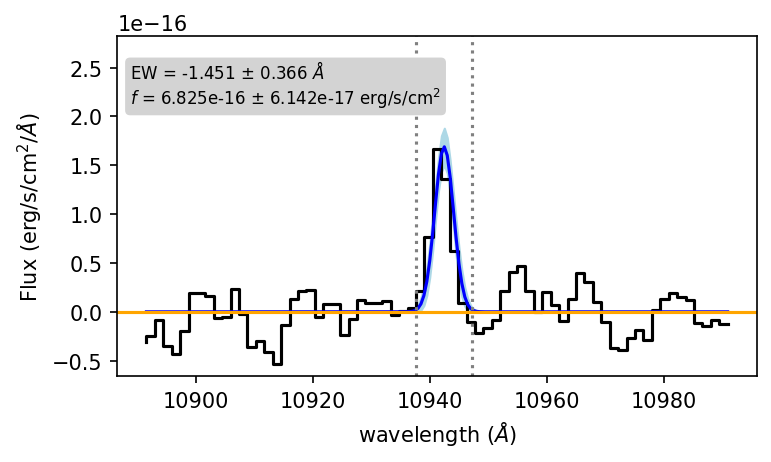

EW:  -1.4514897138276464 +/-  0.365586013147823  A
Fline:  6.824675035520181e-16 +/-  6.141779729988852e-17  erg/s/cm^2
Lline_Lsun:  4.752312591990466e-08 solLum +/- 7.566967026118008e-09 solLum
LOG Lacc_Lsun:  -5.500637800718124 solLum +/- 0.522783421425784 solLum
Lacc_Lsun:  3.157636977937582e-06 solLum +/- 3.801700885566439e-06 solLum
Mdot Mj/yr: 1.4791902072559926e-09 jupiterMass / yr +/- 1.7870524358438522e-09 jupiterMass / yr

Log(Mdot):  -8.829975977017057 jupiterMass / yr +/- 0.5243279419723793
Log(Mass): -1.9208187539523751 solMass +/- 0.03435833333333333 solMass

-1.4514897138276464 0.365586013147823 6.824675035520181e-16 6.141779729988852e-17 -5.500637800718124 0.522783421425784 3.801700885566439e-06 -8.829975977017057 0.5243279419723793
-------- PaB -----------
peak:  1.670581931329405e-16
cont std:  1.2291006119944036e-17
S/N:  13.591905455311998


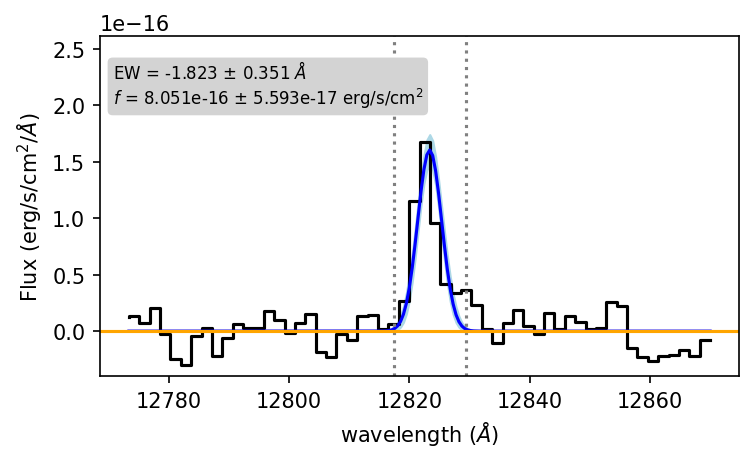

EW:  -1.8232813602751856 +/-  0.35095718506914864  A
Fline:  8.051493819788604e-16 +/-  5.593258635656912e-17  erg/s/cm^2
Lline_Lsun:  5.6065988878543516e-08 solLum +/- 8.3310861641812e-09 solLum
LOG Lacc_Lsun:  -4.926378544269163 solLum +/- 0.6147533297265282 solLum
Lacc_Lsun:  1.1847356463961654e-05 solLum +/- 1.677321382526236e-05 solLum
Mdot Mj/yr: 5.549875994551226e-09 jupiterMass / yr +/- 7.877022949701674e-09 jupiterMass / yr

Log(Mdot):  -8.255716720568095 jupiterMass / yr +/- 0.6159827649350864
Log(Mass): -1.9208187539523751 solMass +/- 0.03435833333333333 solMass

-1.8232813602751856 0.35095718506914864 8.051493819788604e-16 5.593258635656912e-17 -4.926378544269163 0.6147533297265282 1.677321382526236e-05 -8.255716720568095 0.6159827649350864
-----------------
-------- BrG -----------
peak:  1.615798177668352e-17
cont std:  3.562687032738145e-18
S/N:  4.535335725031428


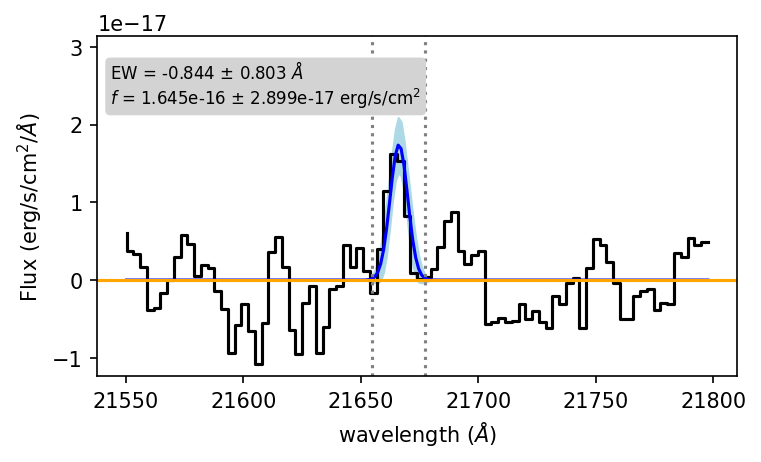

EW:  -0.8436476874730354 +/-  0.8034151149637206  A
Fline:  1.6446937773538032e-16 +/-  2.899095544236776e-17  erg/s/cm^2
Lline_Lsun:  1.1452704938193581e-08 solLum +/- 2.517651578547692e-09 solLum
LOG Lacc_Lsun:  -5.429899394420543 solLum +/- 0.9505783917037423 solLum
Lacc_Lsun:  3.716213062828727e-06 solLum +/- 8.135466879441465e-06 solLum
Mdot Mj/yr: 1.7408543189164902e-09 jupiterMass / yr +/- 3.815033339629217e-09 jupiterMass / yr

Log(Mdot):  -8.759237570719476 jupiterMass / yr +/- 0.9510988090201626
Log(Mass): -1.9208187539523751 solMass +/- 0.03435833333333333 solMass

-0.8436476874730354 0.8034151149637206 1.6446937773538032e-16 2.899095544236776e-17 -5.429899394420543 0.9505783917037423 8.135466879441465e-06 -8.759237570719476 0.9510988090201626


In [4]:
from measure_Mdot import *
%load_ext autoreload
%autoreload 2

data1 = fits.open(Delabb_final)[0]
wave1 = data1.data[0]

flux1 = data1.data[1]
err1 = data1.data[2]

a = measure_Mdot(wave1, flux1, err1, av)
print('-------- PaG -----------')
a.run_measure_object('PaG', dist, mass,radius, plot=True, interactive=False,
                    flat=True, xmincon=25, xmaxcon=25, innercon=4) 


print('-------- PaB -----------')
a.run_measure_object('PaB', dist, mass,radius, plot=True, interactive=False,
                    flat=True, xmincon=25, xmaxcon=25, innercon=7) 
print('-----------------')


print('-------- BrG -----------')
a.run_measure_object('BrG', dist, mass,radius, plot=True, interactive=False,
                    xmin=21550, xmax=21800, innercon=28, xmincon=15, xmaxcon=20) 


## epoch 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-------- PaG -----------
peak:  1.1035185240742098e-16
cont std:  1.9530171210010508e-17
S/N:  5.650326933685985


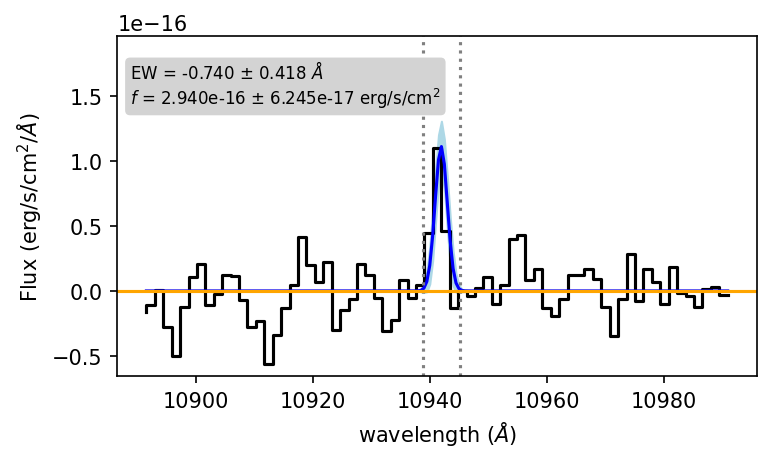

EW:  -0.7402896486872883 +/-  0.4181711185065423  A
Fline:  2.9395056811485404e-16 +/-  6.244923032604373e-17  erg/s/cm^2
Lline_Lsun:  2.0469033016287726e-08 solLum +/- 5.112694186415221e-09 solLum
LOG Lacc_Lsun:  -5.954239315125662 solLum +/- 0.5511786870707573 solLum
Lacc_Lsun:  1.1111192835623024e-06 solLum +/- 1.4104153919572803e-06 solLum
Mdot Mj/yr: 5.205021270089588e-10 jupiterMass / yr +/- 6.627603722735366e-10 jupiterMass / yr

Log(Mdot):  -9.283577491424595 jupiterMass / yr +/- 0.5526163806853456
Log(Mass): -1.9208187539523751 solMass +/- 0.03435833333333333 solMass

-0.7402896486872883 0.4181711185065423 2.9395056811485404e-16 6.244923032604373e-17 -5.954239315125662 0.5511786870707573 1.4104153919572803e-06 -9.283577491424595 0.5526163806853456
-------- PaB -----------
peak:  8.627169665300267e-17
cont std:  1.2349776819863941e-17
S/N:  6.985688722264143


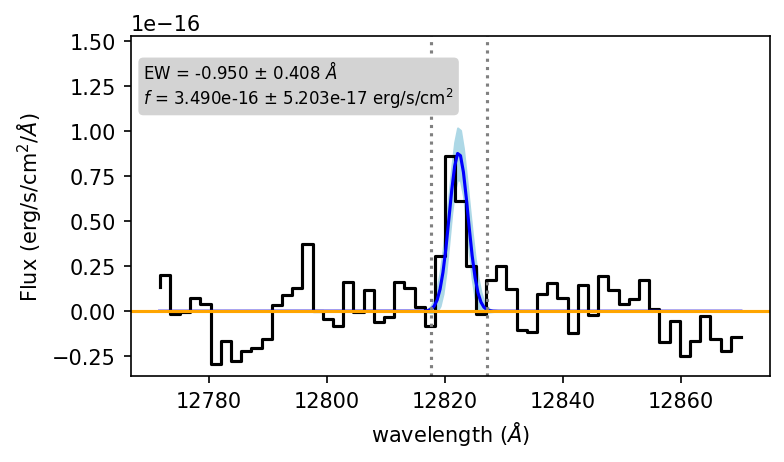

EW:  -0.9501353551242347 +/-  0.40765001516618293  A
Fline:  3.490424212479555e-16 +/-  5.203112083097927e-17  erg/s/cm^2
Lline_Lsun:  2.430531395271142e-08 solLum +/- 4.829099834610351e-09 solLum
LOG Lacc_Lsun:  -5.311156690639276 solLum +/- 0.6387835985849296 solLum
Lacc_Lsun:  4.884760885336574e-06 solLum +/- 7.186062729502754e-06 solLum
Mdot Mj/yr: 2.288258757058362e-09 jupiterMass / yr +/- 3.3740925607831573e-09 jupiterMass / yr

Log(Mdot):  -8.640494866938209 jupiterMass / yr +/- 0.6399434359697905
Log(Mass): -1.9208187539523751 solMass +/- 0.03435833333333333 solMass

-0.9501353551242347 0.40765001516618293 3.490424212479555e-16 5.203112083097927e-17 -5.311156690639276 0.6387835985849296 7.186062729502754e-06 -8.640494866938209 0.6399434359697905
-------- BrG -----------
peak:  1.0360924314703186e-17
cont std:  2.5707786220008106e-18
S/N:  4.030267027286614


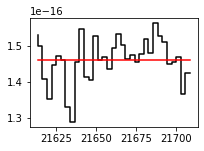

continue?3
calculating upper limit


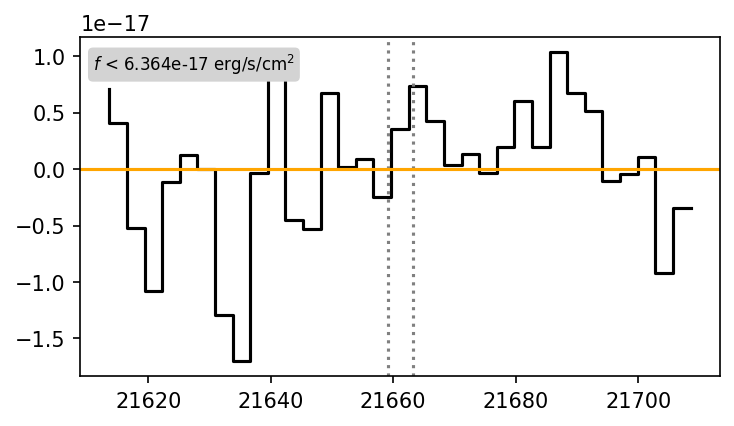

Fline: < 6.36433624168208e-17 erg / (cm2 s)
EW: < 0.3887569662595825 Angstrom
Lline_Lsun: < 4.431759036670632e-09 solLum
LOG Lacc_Lsun: < -5.920574394673913 solLum
Lacc_Lsun: < 1.2006753796243725e-06 solLum
Mdot: < 5.624545430785269e-10 jupiterMass / yr

Log(Mdot): < -9.249912570972846 jupiterMass / yr
Log(Mass): -1.9208187539523751 solMass +/- 0.03435833333333333 solMass

0.3887569662595825 nan 6.36433624168208e-17 nan -5.920574394673913 nan nan -9.249912570972846 nan


In [5]:
from measure_Mdot import *
%load_ext autoreload
%autoreload 2

data1 = fits.open(Delabb_final2)[0]
wave1 = data1.data[0]

flux1 = data1.data[1]
err1 = data1.data[2]

a = measure_Mdot(wave1, flux1, err1, av)
print('-------- PaG -----------')
a.run_measure_object('PaG', dist, mass,radius, plot=True, interactive=False, flat=True, 
                     xmincon=25, xmaxcon=25, innercon=5) 

print('-------- PaB -----------')
a.run_measure_object('PaB', dist, mass,radius, plot=True, interactive=False, flat=True,
                     xmincon=25, xmaxcon=25, innercon=5) 

print('-------- BrG -----------')
a.run_measure_object('BrG', dist, mass,radius, plot=True, interactive=True, flat=True,
                     xmincon=25, xmaxcon=25, innercon=4) 

## HOST SYSTEM

In [6]:
Delab_final = 'Final_data/UT20220123/5FINAL_DelormeAB_V20220316_UT20220123.fits'
Delab_final2 = 'Final_data/UT20220124/5FINAL_DelormeAB_UT20220124_030122.fits'


In [7]:
mass = [0.36, 0.028] # from Delorme 2013
radius = [0.5, 0.2] # guess from MIST/Baraffe2015 models
dist = [47.2, 3.1]
av = 0


In [8]:
from measure_Mdot import *
%load_ext autoreload
%autoreload 2

data1 = fits.open(Delab_final)[0]
wave1 = data1.data[0]

flux1 = data1.data[1]
err1 = data1.data[2]

a = measure_Mdot(wave1, flux1, err1, av)
print('-------- PaG -----------')
a.measure_lineflux('PaG', plot=True, interactive=True) 

print('-------- PaB -----------')
a.measure_lineflux('PaB', plot=True, interactive=True) 

print('-------- BrG -----------')
a.measure_lineflux('BrG', plot=True, interactive=True 

In [9]:
### from measure_Mdot import *
%load_ext autoreload
%autoreload 2

data1 = fits.open(Delab_final2)[0]
wave1 = data1.data[0]

flux1 = data1.data[1]
err1 = data1.data[2]

a = CASPAR_MMdot(wave1, flux1, err1, av)
print('-------- PaG -----------')
a.run_measure_object('PaG', dist, mass,radius, plot=True, interactive=True) 

print('-------- PaB -----------')
a.run_measure_object('PaB', dist, mass,radius, plot=True, interactive=True) 

print('-------- BrG -----------')
a.run_measure_object('BrG', dist, mass,radius, plot=True, interactive=True) 